In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import matplotlib.pylab as plt

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%time
data_root = os.path.join("/", "Users", "ravinderboparai", "Documents", "DSA", "UC_Caseload_Model")
uc_path =os.path.join(data_root, "uc_eco_timeseries.csv") 

CPU times: user 15 µs, sys: 1 µs, total: 16 µs
Wall time: 19.1 µs


In [4]:
uc_data = pd.read_csv(uc_path, header=None)
uc_data1 = uc_data.set_axis(['date', 'customers', 'unemployment','CPI','FTSE 100','GBP/USD','GDP'], axis=1, inplace=True)   

In [5]:
uc_data

,date,customers,unemployment,CPI,FTSE 100,GBP/USD,GDP
0,02/01/09,7944336,7.1,3.2,3830.09,1.4477,461881
1,03/01/09,7986464,7.3,2.9,3926.14,1.4290,461881
2,04/01/09,8024625,7.6,2.3,4243.71,1.4329,460431
3,05/01/09,8134244,7.8,2.2,4417.94,1.4781,460431
4,06/01/09,8171659,7.9,1.8,4249.21,1.6178,460431
...,...,...,...,...,...,...,...
142,12/01/20,11251923,5.1,0.6,6460.52,1.3325,525140
143,01/01/21,11255285,5.0,0.7,6407.46,1.3672,517998
144,02/01/21,11211413,4.9,0.4,6483.43,1.3713,517998
145,03/01/21,11211042,4.8,0.7,6713.63,1.3939,517998


In [6]:
uc_data.shape

(147, 7)

0 date
1 customers
2 unemployment
3 CPI
4 FTSE 100
5 GBP/USD
6 GDP


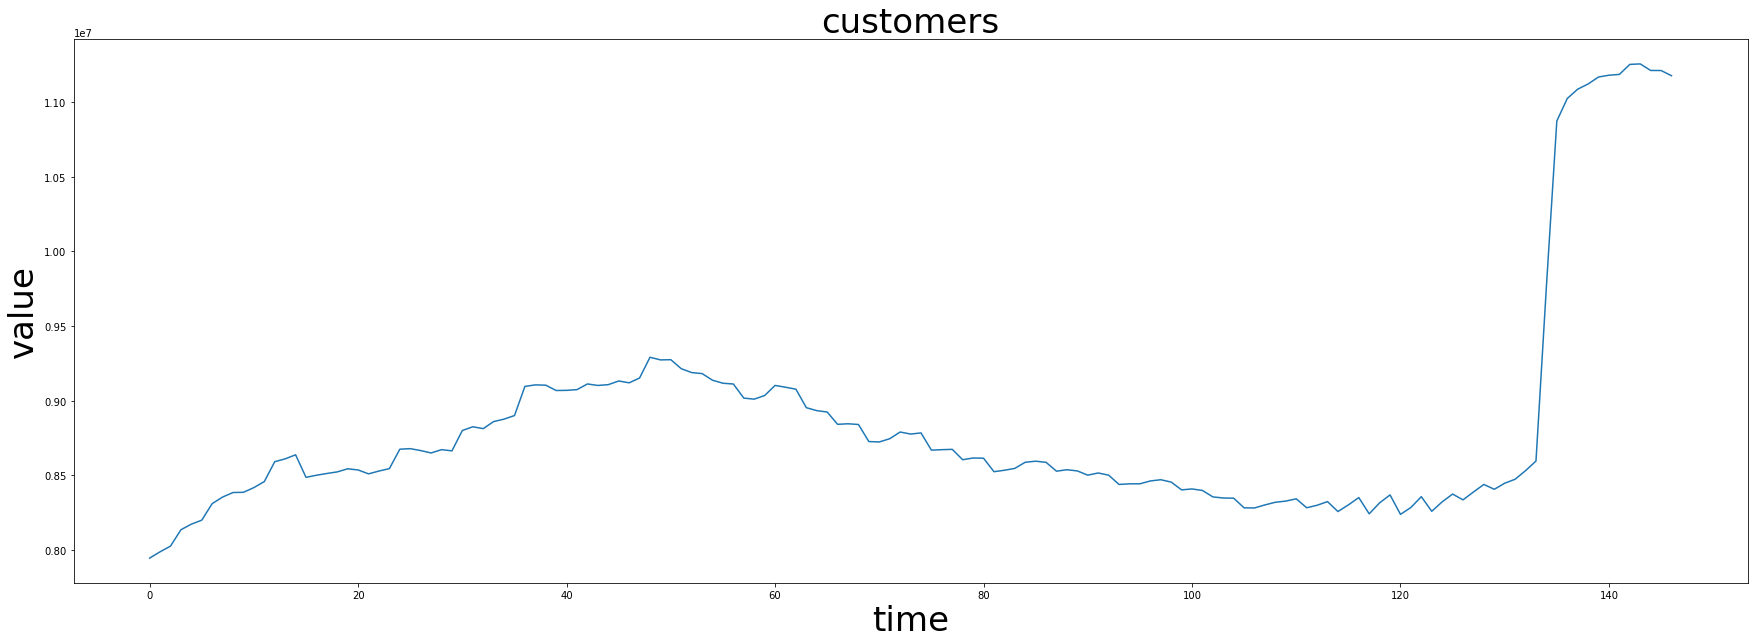

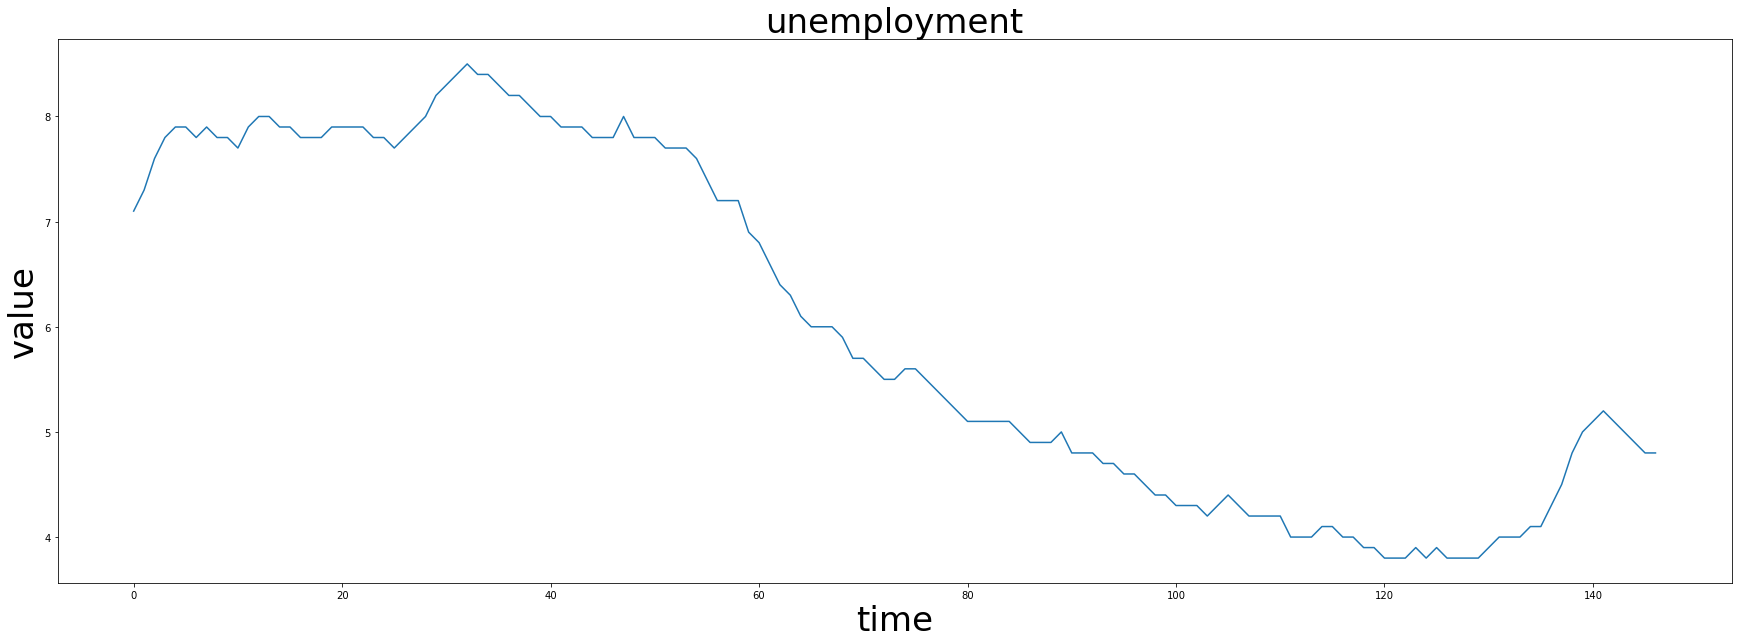

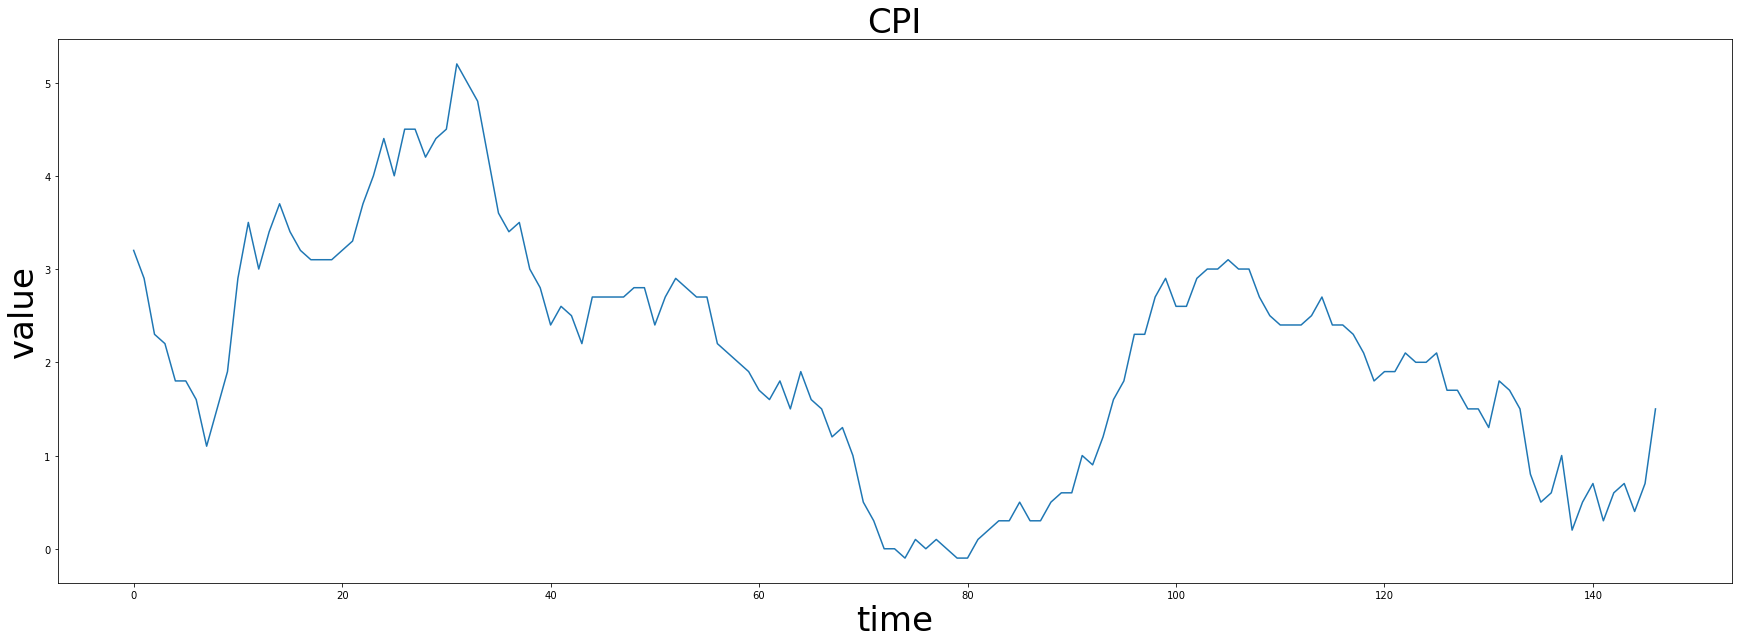

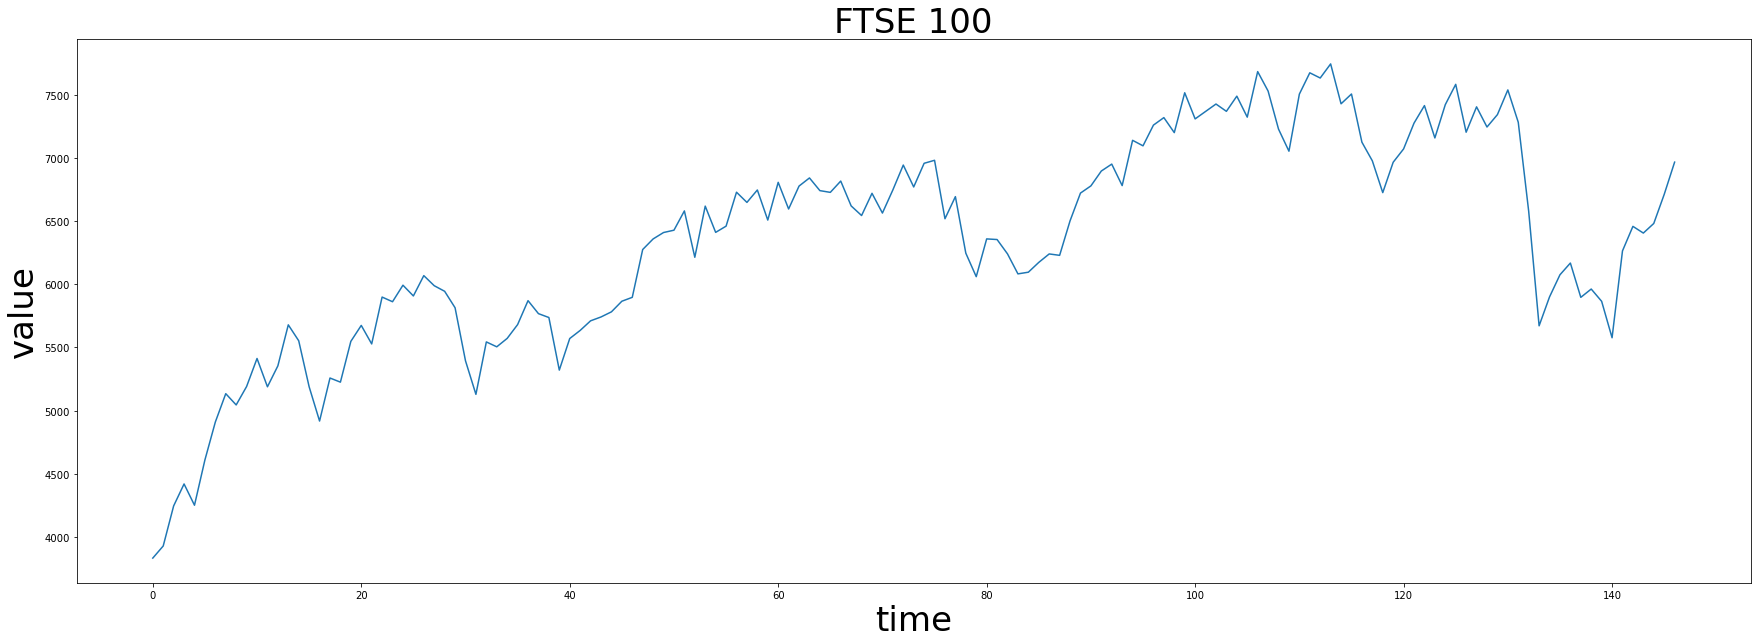

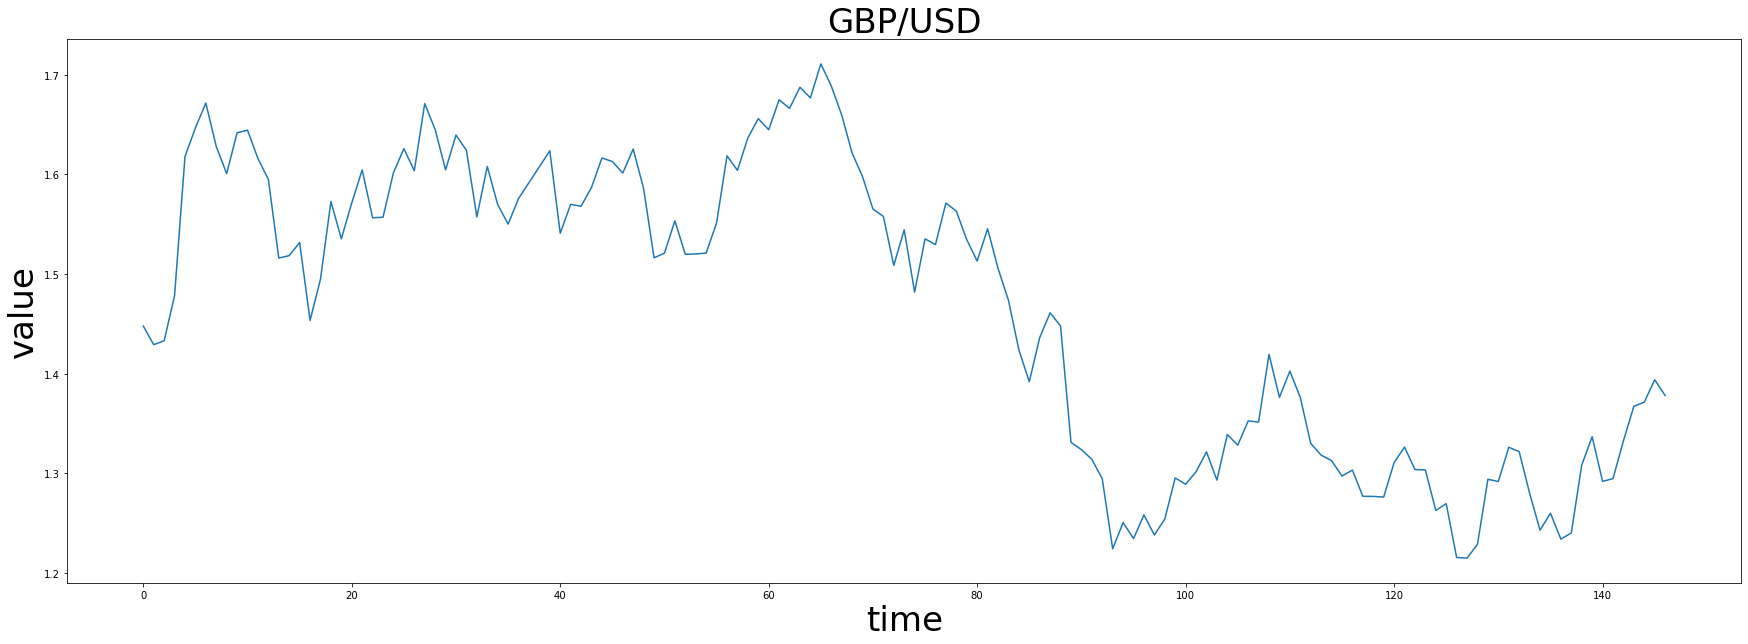

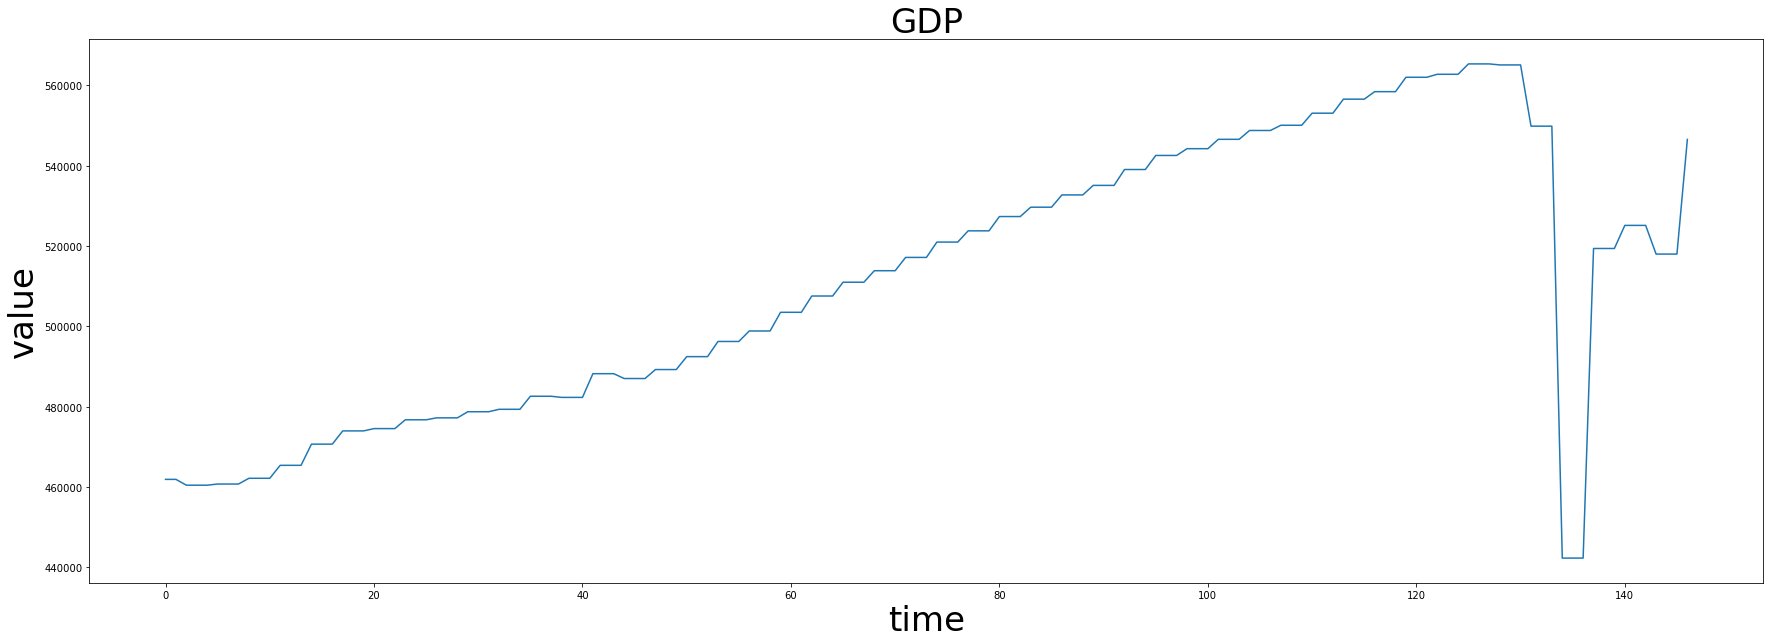

In [7]:
for ind, column in enumerate(uc_data.columns):
    print(ind, column)
    if ind != 0:
        fig, ax = plt.subplots(figsize=(30, 10))
        uc_data[column].head(100000).plot(ax=ax)
        ax.set_xlabel('time',  fontsize=34)
        ax.set_ylabel('value',  fontsize=34)
        ax.set_title(column, fontsize=34)
        

In [8]:
uc_data[["date"]] = uc_data[["date"]].apply(pd.to_datetime)
uc_data = uc_data.set_index('date')
uc_data = uc_data.sort_index()

In [9]:
training_data = uc_data[:119]
training_data.shape

(119, 6)

In [10]:
testing_data = uc_data[119:132]
testing_data.shape

(13, 6)

In [11]:
testing_data

,customers,unemployment,CPI,FTSE 100,GBP/USD,GDP
date,,,,,,
2019-01-01,8367510,3.9,1.8,6968.85,1.2761,562033
2019-02-01,8237301,3.8,1.9,7074.73,1.3107,562033
2019-03-01,8283404,3.8,1.9,7279.19,1.3262,562033
2019-04-01,8355791,3.8,2.1,7418.22,1.3038,562779
2019-05-01,8257812,3.9,2.0,7161.71,1.3033,562779
2019-06-01,8321086,3.8,2.0,7425.63,1.2627,562779
2019-07-01,8373321,3.9,2.1,7586.78,1.2695,565362
2019-08-01,8334445,3.8,1.7,7207.18,1.2155,565362
2019-09-01,8387112,3.8,1.7,7408.21,1.2149,565362


In [12]:
training_data

,customers,unemployment,CPI,FTSE 100,GBP/USD,GDP
date,,,,,,
2009-02-01,7944336,7.1,3.2,3830.09,1.4477,461881
2009-03-01,7986464,7.3,2.9,3926.14,1.4290,461881
2009-04-01,8024625,7.6,2.3,4243.71,1.4329,460431
2009-05-01,8134244,7.8,2.2,4417.94,1.4781,460431
2009-06-01,8171659,7.9,1.8,4249.21,1.6178,460431
...,...,...,...,...,...,...
2018-08-01,8256179,4.1,2.7,7432.42,1.3127,556581
2018-09-01,8300715,4.1,2.4,7510.20,1.2972,556581
2018-10-01,8349778,4.0,2.4,7128.10,1.3032,558448


In [13]:
print(training_data.shape, testing_data.shape)

(119, 6) (13, 6)


In [14]:
import scipy.io
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [15]:
y_train = training_data['customers'].to_numpy(copy=True, dtype=str)
y_test = testing_data['customers'].to_numpy(copy=True, dtype=str)

In [16]:
ploting_data = pd.DataFrame(testing_data['customers'])

In [17]:
training_data = training_data.drop(columns=['customers'])
testing_data = testing_data.drop(columns=['customers'])
X_train = training_data.to_numpy(copy=True, dtype=np.float32)
X_test = testing_data.to_numpy(copy=True, dtype=np.float32)

In [18]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(119, 5) (13, 5) (119,) (13,)


In [19]:
reg = RandomForestRegressor()

In [20]:
reg.fit(X_train, y_train)

RandomForestRegressor()

In [21]:
preds = reg.predict(X_test)

In [22]:
mse = mean_squared_error(y_test, preds)
r2=r2_score(y_test, preds)
mae=mean_absolute_error(y_test, preds)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.

In [23]:
y_test

array(['8367510', '8237301', '8283404', '8355791', '8257812', '8321086',
       '8373321', '8334445', '8387112', '8437700', '8405303', '8445866',
       '8472665'], dtype='<U21')

In [24]:
preds

array([8324614.29, 8320592.08, 8324682.97, 8292216.48, 8315236.28,
       8296620.74, 8291562.12, 8325965.32, 8311921.99, 8325181.23,
       8319105.49, 8318345.23, 8323495.45])

In [25]:
mse

6879442967.577898

In [26]:
r2

-0.42694353672877394

In [27]:
mae

73366.5376923075

In [28]:
testing_data['predictions'] = preds

In [29]:
y_test

array(['8367510', '8237301', '8283404', '8355791', '8257812', '8321086',
       '8373321', '8334445', '8387112', '8437700', '8405303', '8445866',
       '8472665'], dtype='<U21')

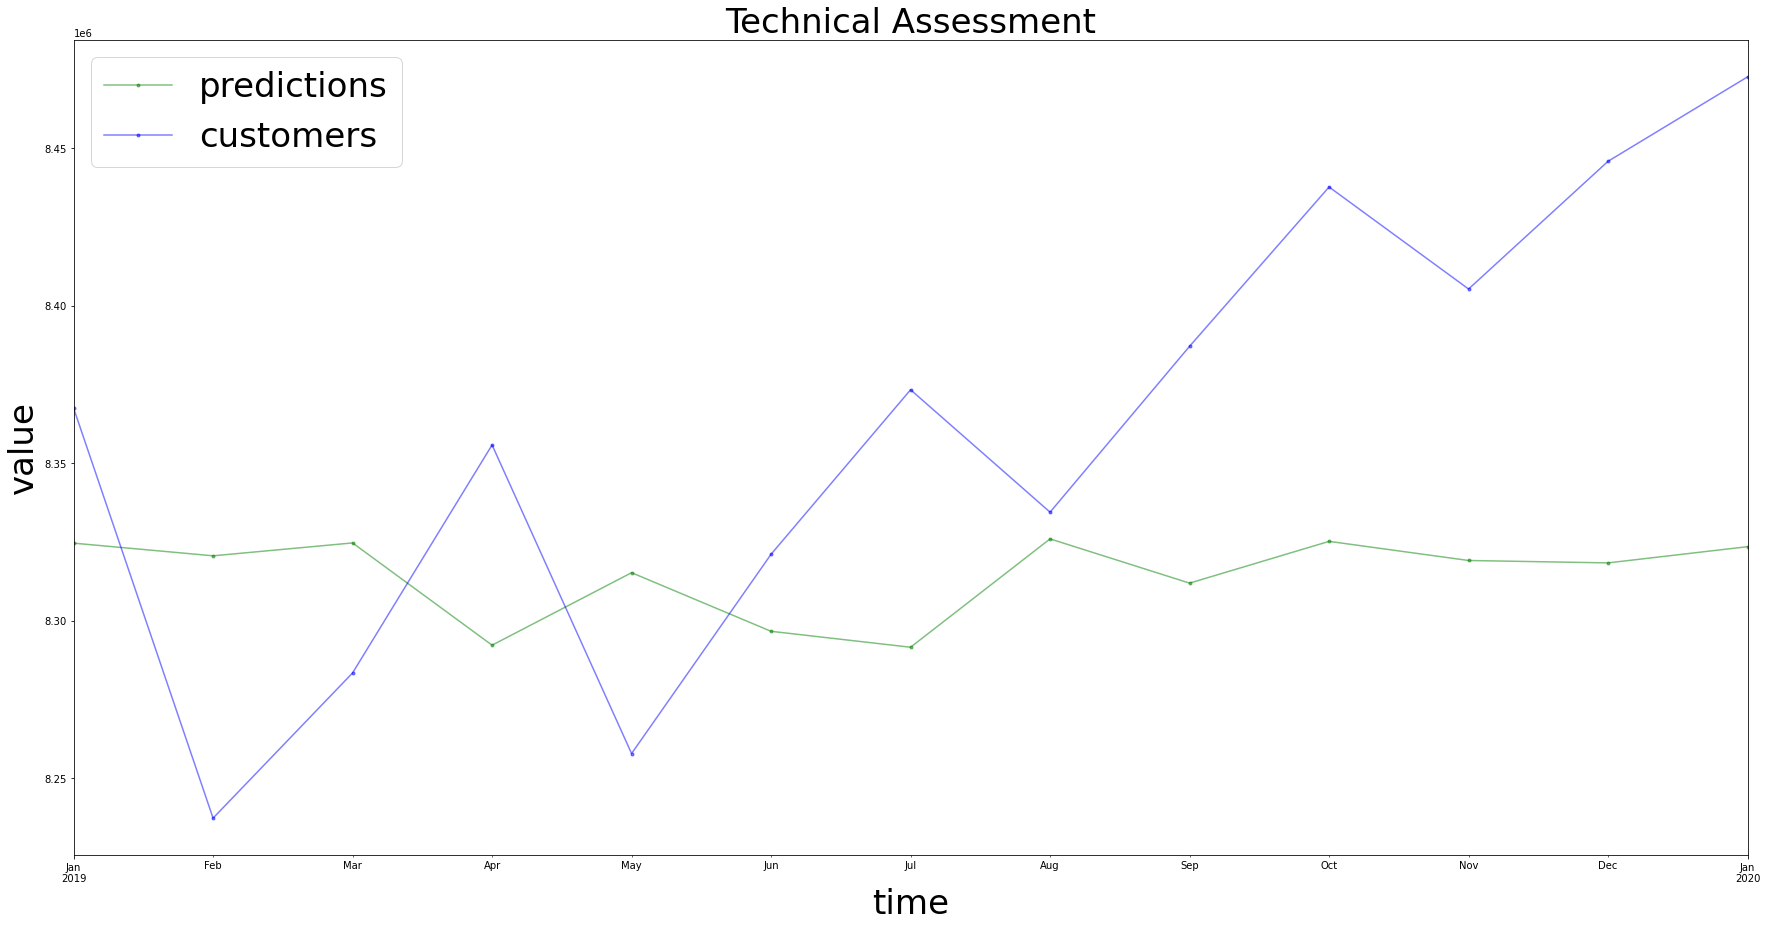

In [30]:
fig, ax = plt.subplots(figsize=(30, 15))
testing_data['predictions'].head(50).plot(ax=ax, marker ='.', alpha=0.5, color='green')
ploting_data['customers'].head(50).plot(ax=ax, marker ='.', alpha=0.5, color='blue')
#testing_data['predictions'].plot(ax=ax, marker ='.')
ax.set_xlabel('time',  fontsize=34)
ax.set_ylabel('value',  fontsize=34)
ax.set_title('Technical Assessment', fontsize=34)
ax.legend(fontsize=34)

In [31]:
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence

In [41]:
my_plots = plot_partial_dependence(reg,       
                                   features=[3,4], # column numbers of plots we want to show
                                   X=X_train,            # raw predictors data.
                                   feature_names=['4','5'], # labels on graphs
                                   grid_resolution=100) # number of values to plot on x axis

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


ValueError: All entries of features must be less than len(feature_names) = 2, got 3.

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


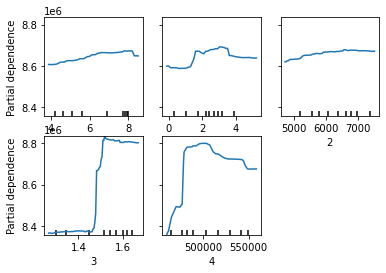

In [63]:
my_plots = plot_partial_dependence(reg, X_train, (0,1,2,3,4),grid_resolution=100) 

array([[ 7.10000e+00,  3.20000e+00,  3.83009e+03,  1.44770e+00,
         4.61881e+05],
       [ 7.30000e+00,  2.90000e+00,  3.92614e+03,  1.42900e+00,
         4.61881e+05],
       [ 7.60000e+00,  2.30000e+00,  4.24371e+03,  1.43290e+00,
         4.60431e+05],
       [ 7.80000e+00,  2.20000e+00,  4.41794e+03,  1.47810e+00,
         4.60431e+05],
       [ 7.90000e+00,  1.80000e+00,  4.24921e+03,  1.61780e+00,
         4.60431e+05],
       [ 7.90000e+00,  1.80000e+00,  4.60836e+03,  1.64650e+00,
         4.60722e+05],
       [ 7.80000e+00,  1.60000e+00,  4.90890e+03,  1.67140e+00,
         4.60722e+05],
       [ 7.90000e+00,  1.10000e+00,  5.13390e+03,  1.62780e+00,
         4.60722e+05],
       [ 7.80000e+00,  1.50000e+00,  5.04455e+03,  1.60060e+00,
         4.62152e+05],
       [ 7.80000e+00,  1.90000e+00,  5.19068e+03,  1.64160e+00,
         4.62152e+05],
       [ 7.70000e+00,  2.90000e+00,  5.41288e+03,  1.64420e+00,
         4.62152e+05],
       [ 7.90000e+00,  3.50000e+00,  5.1885